In [2]:
import scvi
import scanpy as sc
import os
import numpy as np
from matplotlib.pyplot import rc_context
import pandas as pd

Note: preprocessing should be improved in real use case. Very basic preprocessing below

# dedifferentiation data

In [4]:
# Define the directory path
directory = '/home/jing/Phd_project/project_UCD_blca/blca_DATA/blca_DATA_mouse_GSE174182_RAW'
# Get the list of files in the directory (non-recursive)
dirs = os.listdir(directory)

# Create an empty list to store the names
names_list = []

# Extract the unique names from the first 20 characters of the filenames
for x in dirs:
    name = x[:20]
    names_list.append(name)

# Remove duplicates by converting to a set and then back to a list
names_list = list(set(names_list))

# Print the unique names
print(names_list)


['GSM5288673_Sample-8_', '.Rhistory', '.DS_Store', 'GSM5288674_Sample-11', 'GSM5288671_Sample-6_', 'GSM5288670_Sample-5_', 'GSM5288668_Sample-3_', 'GSM5288672_Sample-7_', 'GSM5288669_Sample-4_']


In [11]:
names_list=['GSM5288669_Sample-4_', 'GSM5288670_Sample-5_', 'GSM5288671_Sample-6_', 
            'GSM5288668_Sample-3_', 'GSM5288672_Sample-7_', 'GSM5288673_Sample-8_', 'GSM5288674_Sample-11_']

In [6]:
os.chdir(directory)

In [12]:
adata_list = []

# Loop over each sample and read in the AnnData object
for name in names_list:

    mtx =f"{name}filtered_matrix.mtx.gz"
    adata = sc.read_mtx(mtx)
    cells=pd.read_csv(f'{name}filtered_barcodes.tsv.gz',header=None)
    features=pd.read_csv(f'{name}filtered_features.tsv.gz',header=None,sep='\t')
    adata= adata.T
    #check the columns first to make sure they are the ones you need 
    adata.obs['CellID']= cells[0].tolist()
    adata.var['Gene']= features[1].tolist()
    adata.var.index= adata.var['Gene']
    adata.var_names_make_unique() 

    sc.pp.filter_cells(adata, min_genes=300)
    sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
    upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .97)
    adata = adata[adata.obs.n_genes_by_counts < upper_lim]




    adata.obs['source'] = name[:10]



    adata_list.append(adata)

/tmp/ipykernel_143988/2857563447.py:25: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['source'] = name[:10]
/tmp/ipykernel_143988/2857563447.py:25: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['source'] = name[:10]
/tmp/ipykernel_143988/2857563447.py:25: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['source'] = name[:10]
/tmp/ipykernel_143988/2857563447.py:25: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['source'] = name[:10]
/tmp/ipykernel_143988/2857563447.py:25: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['source'] = name[:10]
/tmp/ipykernel_143988/2857563447.py:25: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing 

In [13]:
batch_names = [adata.obs['source'].iloc[0] for adata in adata_list]
adata = adata_list[0].concatenate(adata_list[1:], batch_key='source', batch_categories=batch_names)                                  

/tmp/ipykernel_143988/1379501109.py:2: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata = adata_list[0].concatenate(adata_list[1:], batch_key='source', batch_categories=batch_names)


In [16]:
adata_list

[AnnData object with n_obs × n_vars = 6498 × 31053
     obs: 'CellID', 'n_genes', 'n_genes_by_counts', 'total_counts', 'source'
     var: 'Gene', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts',
 AnnData object with n_obs × n_vars = 7565 × 31053
     obs: 'CellID', 'n_genes', 'n_genes_by_counts', 'total_counts', 'source'
     var: 'Gene', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts',
 AnnData object with n_obs × n_vars = 8434 × 31053
     obs: 'CellID', 'n_genes', 'n_genes_by_counts', 'total_counts', 'source'
     var: 'Gene', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts',
 AnnData object with n_obs × n_vars = 6829 × 31053
     obs: 'CellID', 'n_genes', 'n_genes_by_counts', 'total_counts', 'source'
     var: 'Gene', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts',
 AnnData object with n_obs × n_vars = 2704 × 31053
     obs: 'CellID', 'n_genes', 'n_genes_by_counts', 'tota

In [53]:
adata.obs

,CellID,n_genes,n_genes_by_counts,total_counts,source,_scvi_batch,_scvi_labels,leiden
0-GSM5288669,AAACCCAAGTCGCTAT-1,4330,4330,14171.0,GSM5288669,0,0,1
1-GSM5288669,AAACCCAAGTTCGGTT-1,4630,4630,16738.0,GSM5288669,0,0,1
3-GSM5288669,AAACCCAGTCGTTGGC-1,4402,4402,14108.0,GSM5288669,0,0,1
4-GSM5288669,AAACCCATCCAGTACA-1,1690,1690,5563.0,GSM5288669,0,0,2
5-GSM5288669,AAACGAAAGTCTTCGA-1,1791,1791,3763.0,GSM5288669,0,0,1
...,...,...,...,...,...,...,...,...
6784-GSM5288674,TTTGTTGCAGTTAGGG-1,1146,1146,2834.0,GSM5288674,0,0,1
6785-GSM5288674,TTTGTTGGTGGTCTCG-1,4356,4356,15910.0,GSM5288674,0,0,1
6786-GSM5288674,TTTGTTGGTGGTTCTA-1,1942,1942,4461.0,GSM5288674,0,0,1
6787-GSM5288674,TTTGTTGTCTGCCTCA-1,3138,3138,9077.0,GSM5288674,0,0,1


In [20]:
adata.raw = adata  # keep full dimension safe
adata.layers['counts'] = adata.X.copy()

sc.pp.highly_variable_genes(
    adata,
    flavor="seurat_v3",
    n_top_genes=2000,
    layer="counts",
    batch_key="source",
    subset=True,)

In [21]:

scvi.model.SCVI.setup_anndata(adata, layer = "counts",
                             categorical_covariate_keys=["source"],
                             continuous_covariate_keys=['total_counts'])


model = scvi.model.SCVI(adata)

In [22]:
model.train() 

/home/jing/miniforge3/envs/cstar/lib/python3.12/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/jing/miniforge3/envs/cstar/lib/python3.12/site ...
  rank_zero_warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/jing/miniforge3/envs/cstar/lib/python3.12/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/jing/miniforge3/envs/cstar/lib/python3.12/site ...
  rank_zero_warn(


Epoch 187/187: 100%|██████████| 187/187 [1:12:47<00:00, 65.53s/it, v_num=1, train_loss_step=558, train_loss_epoch=607]

`Trainer.fit` stopped: `max_epochs=187` reached.


Epoch 187/187: 100%|██████████| 187/187 [1:12:47<00:00, 23.36s/it, v_num=1, train_loss_step=558, train_loss_epoch=607]


In [ ]:
model.train() 

/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (ElboMetric). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_no_full_state`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE

Epoch 89/89: 100%|██████| 89/89 [22:05<00:00, 14.90s/it, loss=7.05e+03, v_num=1]


In [24]:
adata.obsm['X_scVI'] = model.get_latent_representation()

adata.layers['scvi_normalized'] = model.get_normalized_expression(library_size = 1e4)

sc.pp.neighbors(adata, use_rep = 'X_scVI')

sc.tl.umap(adata)

In [45]:
sc.tl.leiden(adata,resolution=0.02)

In [33]:
mde(adata.obsm['X_scVI'])

NameError: name 'mde' is not defined

In [ ]:
sc.pl.embedding(adata,
                basis='X_')

In [46]:
adata.obs['leiden'].value_counts()

leiden
0    14302
1    12394
2     8534
3     7473
Name: count, dtype: int64

In [31]:
set(adata.obs['_scvi_labels'])

{0}

In [57]:
adata.var.index

Index(['Sox17', 'Prex2', 'Sulf1', 'Rdh10', 'Defb41', 'Il17a', 'Paqr8', 'Gsta3',
       'Khdc1a', 'Rims1',
       ...
       'Cfap58', 'Dusp5', 'Plekhs1', 'Csf2ra', 'mt-Co1', 'mt-Co2', 'mt-Nd3',
       'Csprs', 'AC168977.2', 'AC168977.1'],
      dtype='object', name='Gene', length=2000)

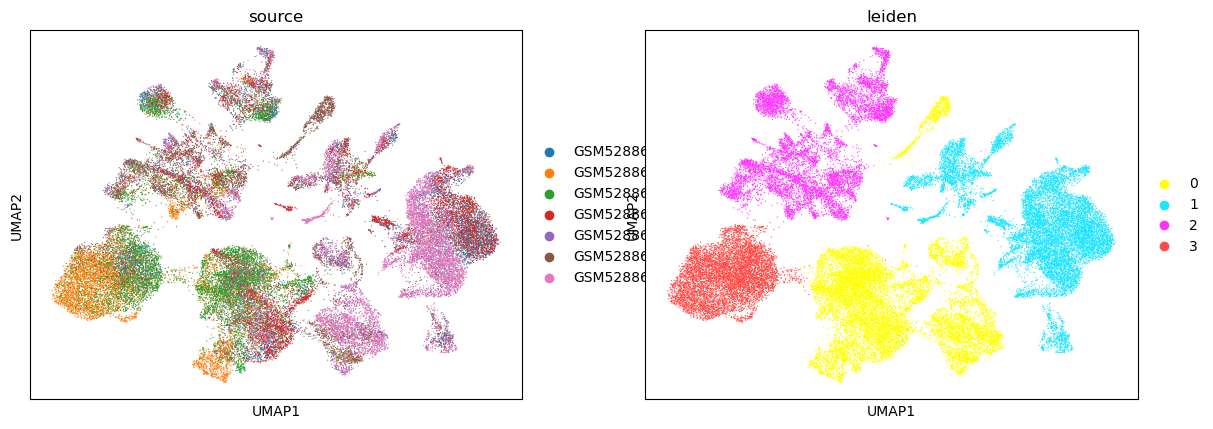

In [47]:
sc.pl.umap(adata, color = ['source','leiden'])

In [55]:
adata

AnnData object with n_obs × n_vars = 42703 × 2000
    obs: 'CellID', 'n_genes', 'n_genes_by_counts', 'total_counts', 'source', '_scvi_batch', '_scvi_labels', 'leiden'
    var: 'Gene', 'n_cells_by_counts-GSM5288668', 'mean_counts-GSM5288668', 'pct_dropout_by_counts-GSM5288668', 'total_counts-GSM5288668', 'n_cells_by_counts-GSM5288669', 'mean_counts-GSM5288669', 'pct_dropout_by_counts-GSM5288669', 'total_counts-GSM5288669', 'n_cells_by_counts-GSM5288670', 'mean_counts-GSM5288670', 'pct_dropout_by_counts-GSM5288670', 'total_counts-GSM5288670', 'n_cells_by_counts-GSM5288671', 'mean_counts-GSM5288671', 'pct_dropout_by_counts-GSM5288671', 'total_counts-GSM5288671', 'n_cells_by_counts-GSM5288672', 'mean_counts-GSM5288672', 'pct_dropout_by_counts-GSM5288672', 'total_counts-GSM5288672', 'n_cells_by_counts-GSM5288673', 'mean_counts-GSM5288673', 'pct_dropout_by_counts-GSM5288673', 'total_counts-GSM5288673', 'n_cells_by_counts-GSM5288674', 'mean_counts-GSM5288674', 'pct_dropout_by_counts-GSM528867

In [59]:
adata.var['n_cells_by_counts-GSM5288668'] 

Gene
Sox17          183
Prex2         1080
Sulf1         1198
Rdh10         1392
Defb41           0
              ... 
mt-Co2        6969
mt-Nd3        6080
Csprs          697
AC168977.2     205
AC168977.1     682
Name: n_cells_by_counts-GSM5288668, Length: 2000, dtype: int32

In [50]:
print(adata.var.index.name)
print(adata.var.columns)


Gene
Index(['Gene', 'n_cells_by_counts-GSM5288668', 'mean_counts-GSM5288668',
       'pct_dropout_by_counts-GSM5288668', 'total_counts-GSM5288668',
       'n_cells_by_counts-GSM5288669', 'mean_counts-GSM5288669',
       'pct_dropout_by_counts-GSM5288669', 'total_counts-GSM5288669',
       'n_cells_by_counts-GSM5288670', 'mean_counts-GSM5288670',
       'pct_dropout_by_counts-GSM5288670', 'total_counts-GSM5288670',
       'n_cells_by_counts-GSM5288671', 'mean_counts-GSM5288671',
       'pct_dropout_by_counts-GSM5288671', 'total_counts-GSM5288671',
       'n_cells_by_counts-GSM5288672', 'mean_counts-GSM5288672',
       'pct_dropout_by_counts-GSM5288672', 'total_counts-GSM5288672',
       'n_cells_by_counts-GSM5288673', 'mean_counts-GSM5288673',
       'pct_dropout_by_counts-GSM5288673', 'total_counts-GSM5288673',
       'n_cells_by_counts-GSM5288674', 'mean_counts-GSM5288674',
       'pct_dropout_by_counts-GSM5288674', 'total_counts-GSM5288674',
       'highly_variable', 'highly_variable

In [83]:
leiden_cluster0=adata[adata.obs["leiden"] == "0"]

In [95]:
import seaborn

In [107]:
value_counts = leiden_cluster0.obs['source'].value_counts()

In [110]:
leiden_cluster0.write_h5ad('/home/jing/Phd_project/project_UCD_blca/blca_OUTPUT/blca_OUTPUT_scvi/leiden0.h5ad')


ValueError: DataFrame.index.name ('Gene') is also used by a column whose values are different. This is not supported. Please make sure the values are the same, or use a different name.

In [108]:
value_counts

source
GSM5288671    4067
GSM5288670    2351
GSM5288673    1887
GSM5288674    1819
GSM5288668    1790
GSM5288669    1329
GSM5288672    1059
Name: count, dtype: int64

In [63]:
if 'Gene' in copy_adata.var.columns and copy_adata.var.index.name == 'Gene':
    copy_adata.var.index.name = 'Gene'

In [64]:
copy_adata.write_h5ad('/home/jing/Phd_project/project_UCD_blca/blca_OUTPUT/blca_OUTPUT_scvi/scvi_blca_var_Gene.h5ad')


ValueError: DataFrame.index.name ('Gene') is also used by a column whose values are different. This is not supported. Please make sure the values are the same, or use a different name.

In [ ]:
# Rename the index
adata.var.index.name = 'Gene'

# Save the AnnData object
adata.write_h5ad('/home/jing/Phd_project/project_UCD_blca/blca_OUTPUT/blca_OUTPUT_scvi/scvi_blca.h5ad')


In [71]:
import loompy

In [72]:
adata.write_loom('/home/jing/Phd_project/project_UCD_blca/blca_OUTPUT/blca_OUTPUT_scvi/scvi_blca.loom')

The loom file will lack these fields:
{'X_umap', '_scvi_extra_continuous_covs', '_scvi_extra_categorical_covs', 'X_scVI'}
Use write_obsm_varm=True to export multi-dimensional annotations


In [76]:
import anndata
anndata.read_loom('/home/jing/Phd_project/project_UCD_blca/blca_OUTPUT/blca_OUTPUT_scvi/scvi_blca.loom')

/home/jing/miniforge3/envs/cstar/lib/python3.12/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 42703 × 2000
    obs: '_scvi_batch', '_scvi_labels', 'leiden', 'n_genes', 'n_genes_by_counts', 'obs_names', 'source', 'total_counts'
    var: 'highly_variable', 'highly_variable_nbatches', 'highly_variable_rank', 'mean_counts-GSM5288668', 'mean_counts-GSM5288669', 'mean_counts-GSM5288670', 'mean_counts-GSM5288671', 'mean_counts-GSM5288672', 'mean_counts-GSM5288673', 'mean_counts-GSM5288674', 'means', 'n_cells_by_counts-GSM5288668', 'n_cells_by_counts-GSM5288669', 'n_cells_by_counts-GSM5288670', 'n_cells_by_counts-GSM5288671', 'n_cells_by_counts-GSM5288672', 'n_cells_by_counts-GSM5288673', 'n_cells_by_counts-GSM5288674', 'pct_dropout_by_counts-GSM5288668', 'pct_dropout_by_counts-GSM5288669', 'pct_dropout_by_counts-GSM5288670', 'pct_dropout_by_counts-GSM5288671', 'pct_dropout_by_counts-GSM5288672', 'pct_dropout_by_counts-GSM5288673', 'pct_dropout_by_counts-GSM5288674', 'total_counts-GSM5288668', 'total_counts-GSM5288669', 'total_counts-GSM5288670', 't

In [66]:
sc.read_h5ad('/home/jing/Phd_project/project_UCD_blca/blca_OUTPUT/blca_OUTPUT_scvi/scvi_blca.h5ad')

KeyError: "Unable to synchronously open object (object 'obs' doesn't exist)"

# CD16 removed

In [ ]:
import scvi
import scanpy as sc
import os
import numpy as np
from matplotlib.pyplot import rc_context

Global seed set to 0


In [ ]:
dirs = os.listdir('pbmc_cd16/')
dirs = [x for x in dirs if 'csv' not in x]
dirs

['MH8919332',
 'MH8919178',
 'MH8919283',
 'MH8919333',
 'MH8919179',
 'MH8919177',
 'MH8919227',
 'MH8919176',
 'MH8919282',
 'MH8919226',
 'newcastle65',
 'newcastle74']

In [ ]:
def pp(path):
    adata = sc.read_10x_mtx(path)
    
    sc.pp.filter_cells(adata, min_genes=300)
    sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
    upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .97)
    adata = adata[adata.obs.n_genes_by_counts < upper_lim]
    
    
    adata.obs['Sample'] = path.split('/')[1]
    
    return adata

In [ ]:
datas = [pp('pbmc_cd16/' + x) for x in dirs]

/tmp/ipykernel_9832/2414022266.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Sample'] = path.split('/')[1]
/tmp/ipykernel_9832/2414022266.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Sample'] = path.split('/')[1]
/tmp/ipykernel_9832/2414022266.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Sample'] = path.split('/')[1]
/tmp/ipykernel_9832/2414022266.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Sample'] = path.split('/')[1]
/tmp/ipykernel_9832/2414022266.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Sample'] = path.split('/')[1]
/tmp/ipykernel_9832/2414022266.py:10: ImplicitModificationWarning: Trying to modify attrib

In [ ]:
adata = sc.concat(datas)

In [ ]:
adata

AnnData object with n_obs × n_vars = 61728 × 24929
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'Sample'

In [ ]:
adata.obs

,n_genes,n_genes_by_counts,total_counts,Sample
AAACCTGAGACAGAGA-MH8919332,997,997,3796.0,MH8919332
AAACCTGAGAGAGCTC-MH8919332,1124,1124,3439.0,MH8919332
AAACCTGAGCAGGTCA-MH8919332,901,901,3550.0,MH8919332
AAACCTGAGCTCCTTC-MH8919332,1966,1966,8749.0,MH8919332
AAACCTGAGTCAAGGC-MH8919332,1057,1057,3985.0,MH8919332
...,...,...,...,...
TTTGTCAGTAGCTAAA-newcastle74,1451,1451,3687.0,newcastle74
TTTGTCATCATGTAGC-newcastle74,1633,1633,5181.0,newcastle74
TTTGTCATCTCAAGTG-newcastle74,1532,1532,4672.0,newcastle74
TTTGTCATCTTCAACT-newcastle74,1273,1273,2903.0,newcastle74


In [ ]:
sc.pp.filter_genes(adata, min_cells = 100)

adata.layers['counts'] = adata.X.copy()

scvi.model.SCVI.setup_anndata(adata, layer = "counts",
                             categorical_covariate_keys=["Sample"],
                             continuous_covariate_keys=['total_counts'])


model = scvi.model.SCVI(adata)

adfsdfsdf
adfsdfsdf


In [ ]:
model.train() 

/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (ElboMetric). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_no_full_state`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE

Epoch 130/130: 100%|██| 130/130 [19:06<00:00,  8.82s/it, loss=4.34e+03, v_num=1]


In [ ]:
adata.obsm['X_scVI'] = model.get_latent_representation()

adata.layers['scvi_normalized'] = model.get_normalized_expression(library_size = 1e4)

sc.pp.neighbors(adata, use_rep = 'X_scVI')

sc.tl.umap(adata)

In [ ]:
cells = pd.read_csv('pbmc_cd16/cell_types.csv')
cells = dict(zip(cells.covid_index, cells.initial_clustering))

adata.obs['cell_type'] = adata.obs.index.map(cells)

In [ ]:
adata.obs

,n_genes,n_genes_by_counts,total_counts,Sample,_scvi_batch,_scvi_labels,cell_type
AAACCTGAGACAGAGA-MH8919332,997,997,3796.0,MH8919332,0,0,CD8
AAACCTGAGAGAGCTC-MH8919332,1124,1124,3439.0,MH8919332,0,0,CD8
AAACCTGAGCAGGTCA-MH8919332,901,901,3550.0,MH8919332,0,0,CD8
AAACCTGAGCTCCTTC-MH8919332,1966,1966,8749.0,MH8919332,0,0,CD14
AAACCTGAGTCAAGGC-MH8919332,1057,1057,3985.0,MH8919332,0,0,CD8
...,...,...,...,...,...,...,...
TTTGTCAGTAGCTAAA-newcastle74,1451,1451,3687.0,newcastle74,0,0,CD8
TTTGTCATCATGTAGC-newcastle74,1633,1633,5181.0,newcastle74,0,0,CD4
TTTGTCATCTCAAGTG-newcastle74,1532,1532,4672.0,newcastle74,0,0,CD8
TTTGTCATCTTCAACT-newcastle74,1273,1273,2903.0,newcastle74,0,0,NK_16hi


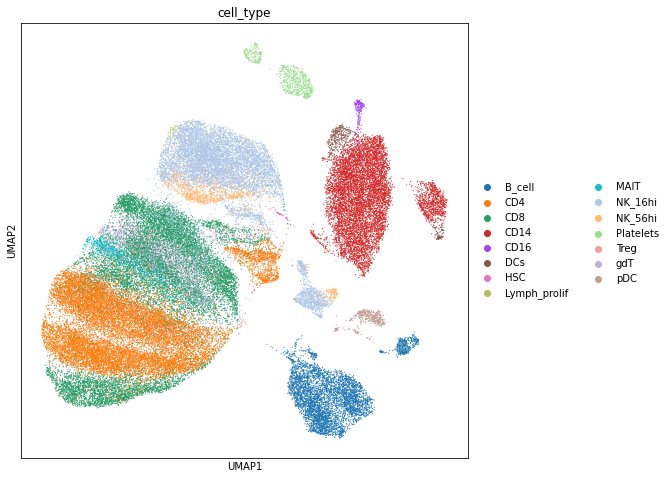

In [ ]:
with rc_context({'figure.figsize': (8, 8)}):
    sc.pl.umap(adata, color = 'cell_type', s = 5)

In [ ]:
adata.write_h5ad('data_saved/scvi_cd16.h5ad')